In [1]:
# necessary imports.
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier,RidgeClassifier,LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from scipy.stats import mode
from sklearn.ensemble import *
import xgboost as xgb
import lightgbm as lgb
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

## Only the following libraries will be allowed to be used in the competition:

1. NumPy
2. Pandas
3. Matplotlib
4. Scikit-learn 
5. XGBoost
6. Seaborn
7. Imblearn
8. SciPy
9. Pickle
10. regex
11. Lightgbm
12. Plotly

## Crude workflow.
1. perform EDA-cum-Dimensionaltity reduction.
2. standarsise the data if not in the first step.
3. make the model 
4. tarin the model on the data 
5. test the model and then train on the entire dataset.
6. finally make the prdictino and submit the project.

## Loading the data

In [2]:
train=pd.read_csv(r'/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv')
train

,last contact date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,target
0,2009-04-17,26,blue-collar,married,secondary,no,647,yes,no,cellular,357,2,331,1,other,no
1,2009-10-11,52,technician,married,secondary,no,553,yes,no,telephone,160,1,-1,0,NaN,no
2,2010-11-20,44,blue-collar,married,secondary,no,1397,no,no,cellular,326,1,-1,0,NaN,no
3,2009-09-01,33,admin.,married,secondary,no,394,yes,no,telephone,104,3,-1,0,NaN,no
4,2008-01-29,31,entrepreneur,single,tertiary,no,137,no,no,cellular,445,2,-1,0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39206,2008-07-31,31,technician,single,secondary,no,0,yes,no,cellular,16,34,-1,0,NaN,no
39207,2009-07-31,59,admin.,married,primary,no,6187,no,no,cellular,114,4,-1,0,NaN,no
39208,2008-06-02,36,blue-collar,married,secondary,no,63,yes,no,NaN,56,8,-1,0,NaN,no
39209,2010-03-20,28,student,single,secondary,no,5916,no,no,cellular,93,5,-1,0,NaN,no


In [3]:
train_1=train.copy()

In [4]:
unique_values = {}
colns = train.select_dtypes(include=['object']).columns  

for col in colns:
    unique_values[col] = train[col].unique()  

unique_values


{'last contact date': array(['2009-04-17', '2009-10-11', '2010-11-20', ..., '2009-07-05',
        '2008-02-25', '2010-04-12'], dtype=object),
 'job': array(['blue-collar', 'technician', 'admin.', 'entrepreneur',
        'unemployed', 'management', 'services', 'student', 'self-employed',
        'retired', 'housemaid', nan], dtype=object),
 'marital': array(['married', 'single', 'divorced'], dtype=object),
 'education': array(['secondary', 'tertiary', 'primary', nan], dtype=object),
 'default': array(['no', 'yes'], dtype=object),
 'housing': array(['yes', 'no'], dtype=object),
 'loan': array(['no', 'yes'], dtype=object),
 'contact': array(['cellular', 'telephone', nan], dtype=object),
 'poutcome': array(['other', nan, 'failure', 'success'], dtype=object),
 'target': array(['no', 'yes'], dtype=object)}

In [5]:
train.describe()

,age,balance,duration,campaign,pdays,previous
count,39211.000000,39211.000000,39211.000000,39211.000000,39211.000000,39211.000000
mean,42.120247,5441.781719,439.062789,5.108770,72.256051,11.826171
std,12.709352,16365.292065,769.096291,9.890153,160.942593,44.140259
min,18.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,98.000000,109.000000,1.000000,-1.000000,0.000000
50%,40.000000,549.000000,197.000000,2.000000,-1.000000,0.000000
75%,50.000000,2030.000000,380.000000,4.000000,-1.000000,0.000000
max,95.000000,102127.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
train['last contact date'] = pd.to_datetime(train['last contact date'])

## EDA and cleaning the data

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39211 entries, 0 to 39210
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   last contact date  39211 non-null  datetime64[ns]
 1   age                39211 non-null  int64         
 2   job                38982 non-null  object        
 3   marital            39211 non-null  object        
 4   education          37744 non-null  object        
 5   default            39211 non-null  object        
 6   balance            39211 non-null  int64         
 7   housing            39211 non-null  object        
 8   loan               39211 non-null  object        
 9   contact            28875 non-null  object        
 10  duration           39211 non-null  int64         
 11  campaign           39211 non-null  int64         
 12  pdays              39211 non-null  int64         
 13  previous           39211 non-null  int64         
 14  poutco

In [8]:
def custom_preprocessing(df, ordinal_cols, target=None):
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    categorical_cols = [col for col in df.columns if df[col].dtype == 'object' and col not in ordinal_cols]

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', Pipeline([
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('scaler', StandardScaler())
            ]), numeric_cols),
            ('ord', Pipeline([
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder', OrdinalEncoder())
            ]), ordinal_cols),
            ('cat', Pipeline([
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder', OneHotEncoder(sparse=False, drop='first'))
            ]), categorical_cols)
        ]
    )
    
    processed_data = preprocessor.fit_transform(df)
    processed_df = pd.DataFrame(processed_data, columns=preprocessor.get_feature_names_out())
    processed_df.columns = [col.split('__')[-1] for col in processed_df.columns]

    # Desired column order
    desired_columns = [
        'age', 'job', 'education', 'balance', 'duration', 'campaign', 'pdays', 'previous', 
        'default_yes', 'contact_telephone', 'poutcome_other', 'poutcome_success'
    ]

    # Reordering the DataFrame to the desired column order
    processed_df = processed_df[desired_columns]

    if target and target in df.columns:
        target_encoder = OrdinalEncoder()
        processed_df[target] = target_encoder.fit_transform(df[[target]])
        processed_df = processed_df[[col for col in processed_df.columns if col != target] + [target]]

    return processed_df


In [9]:
train.isna().sum()

last contact date        0
age                      0
job                    229
marital                  0
education             1467
default                  0
balance                  0
housing                  0
loan                     0
contact              10336
duration                 0
campaign                 0
pdays                    0
previous                 0
poutcome             29451
target                   0
dtype: int64

In [10]:
# Get the mode of the columns and their counts
poutcome_mode = train['poutcome'].mode()[0]
poutcome_count = (train['poutcome'] == poutcome_mode).sum()

contact_mode = train['contact'].mode()[0]
contact_count = (train['contact'] == contact_mode).sum()

education_mode = train['education'].mode()[0]
education_count = (train['education'] == education_mode).sum()

job_mode = train['job'].mode()[0]
job_count = (train['job'] == job_mode).sum()

# Print the modes and their counts
print(f"The mode of the 'poutcome' column is: {poutcome_mode} (Count: {poutcome_count})")
print(f"The mode of the 'contact' column is: {contact_mode} (Count: {contact_count})")
print(f"The mode of the 'education' column is: {education_mode} (Count: {education_count})")
print(f"The mode of the 'job' column is: {job_mode} (Count: {job_count})")


The mode of the 'poutcome' column is: failure (Count: 4949)
The mode of the 'contact' column is: cellular (Count: 25030)
The mode of the 'education' column is: secondary (Count: 19584)
The mode of the 'job' column is: blue-collar (Count: 7776)


In [11]:
train.isna().sum()

last contact date        0
age                      0
job                    229
marital                  0
education             1467
default                  0
balance                  0
housing                  0
loan                     0
contact              10336
duration                 0
campaign                 0
pdays                    0
previous                 0
poutcome             29451
target                   0
dtype: int64

In [12]:
# dummy train to store the encoded values
d_train=train.copy()

In [13]:
d_train['poutcome'].fillna(poutcome_mode, inplace=True)
d_train['contact'].fillna(contact_mode, inplace=True)
d_train['education'].fillna(education_mode, inplace=True)
d_train['job'].fillna(job_mode, inplace=True)

/tmp/ipykernel_17/2671790911.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  d_train['poutcome'].fillna(poutcome_mode, inplace=True)
/tmp/ipykernel_17/2671790911.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

In [14]:
oe = OrdinalEncoder()
# onehot=OneHotEncoder()
'''cols to be encoded using oe:
1. education
2, jobs
rest all will be encoded using ohe.''' 

for i in train.columns:
    if train[i].dtype == 'object':
        # Fit and transform only the unique values of the column
        unique_values = train[i].unique().reshape(-1, 1)  # Reshape for a 2D array
        encoded_values = oe.fit_transform(unique_values)
        
        # Print the original unique values and their encoded values
        print(f"Column: {i}")
        print("Original unique values:\n", unique_values.flatten())  # Original unique values
        print("Encoded values:\n", encoded_values.flatten())  # Encoded values
        print()  # Print a new line for better separation
        
        # Assign the encoded values back to the DataFrame for the original column
        d_train[i] = oe.transform(train[[i]])

d_train.info()


Column: job
Original unique values:
 ['blue-collar' 'technician' 'admin.' 'entrepreneur' 'unemployed'
 'management' 'services' 'student' 'self-employed' 'retired' 'housemaid'
 nan]
Encoded values:
 [ 1.  9.  0.  2. 10.  4.  7.  8.  6.  5.  3. nan]

Column: marital
Original unique values:
 ['married' 'single' 'divorced']
Encoded values:
 [1. 2. 0.]

Column: education
Original unique values:
 ['secondary' 'tertiary' 'primary' nan]
Encoded values:
 [ 1.  2.  0. nan]

Column: default
Original unique values:
 ['no' 'yes']
Encoded values:
 [0. 1.]

Column: housing
Original unique values:
 ['yes' 'no']
Encoded values:
 [1. 0.]

Column: loan
Original unique values:
 ['no' 'yes']
Encoded values:
 [0. 1.]

Column: contact
Original unique values:
 ['cellular' 'telephone' nan]
Encoded values:
 [ 0.  1. nan]

Column: poutcome
Original unique values:
 ['other' nan 'failure' 'success']
Encoded values:
 [ 1. nan  0.  2.]

Column: target
Original unique values:
 ['no' 'yes']
Encoded values:
 [0. 1.]

<

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but OrdinalEncoder was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but OrdinalEncoder was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but OrdinalEncoder was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but OrdinalEncoder was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but OrdinalEncoder was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but OrdinalEncoder was fitted without feature names
  warnings.warn(
/opt/conda/lib/p

In [15]:
d_train

,last contact date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,target
0,2009-04-17,26,1.0,1.0,1.0,0.0,647,1.0,0.0,0.0,357,2,331,1,1.0,0.0
1,2009-10-11,52,9.0,1.0,1.0,0.0,553,1.0,0.0,1.0,160,1,-1,0,NaN,0.0
2,2010-11-20,44,1.0,1.0,1.0,0.0,1397,0.0,0.0,0.0,326,1,-1,0,NaN,0.0
3,2009-09-01,33,0.0,1.0,1.0,0.0,394,1.0,0.0,1.0,104,3,-1,0,NaN,0.0
4,2008-01-29,31,2.0,2.0,2.0,0.0,137,0.0,0.0,0.0,445,2,-1,0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39206,2008-07-31,31,9.0,2.0,1.0,0.0,0,1.0,0.0,0.0,16,34,-1,0,NaN,0.0
39207,2009-07-31,59,0.0,1.0,0.0,0.0,6187,0.0,0.0,0.0,114,4,-1,0,NaN,0.0
39208,2008-06-02,36,1.0,1.0,1.0,0.0,63,1.0,0.0,NaN,56,8,-1,0,NaN,0.0
39209,2010-03-20,28,8.0,2.0,1.0,0.0,5916,0.0,0.0,0.0,93,5,-1,0,NaN,0.0


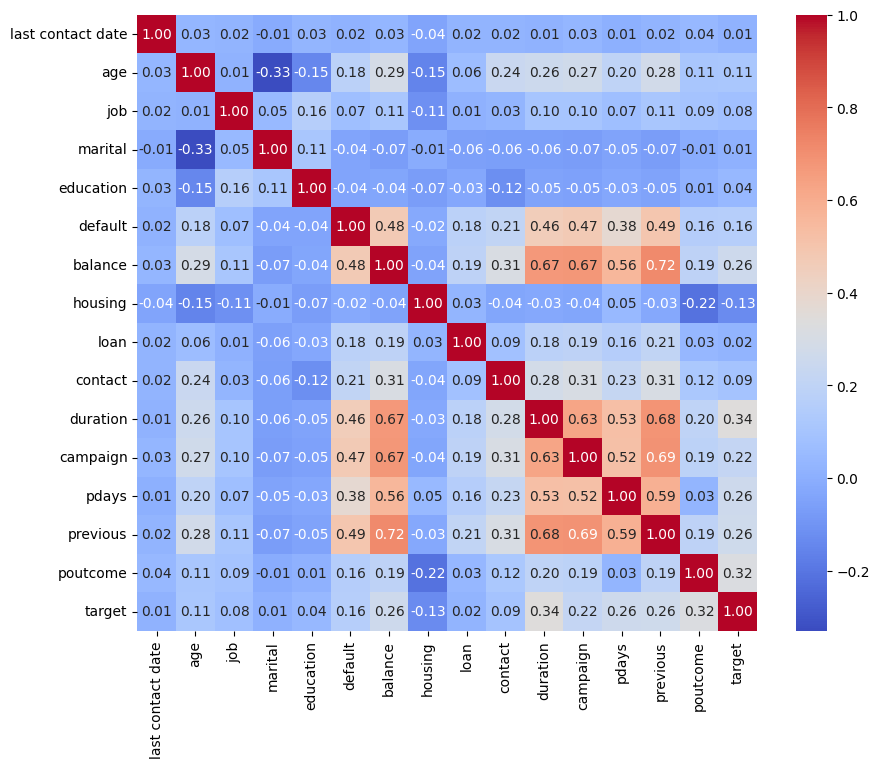

In [16]:
corr=d_train.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [17]:
# droping it so as to remove the negatively correlated column, and the ones with very low correlation
train.drop('housing',inplace=True,axis=1)
train.drop(['last contact date','marital','loan'],inplace=True,axis=1)

In [18]:
# using the method, custom_preprocessing.
ordinal_columns = ['education', 'job']
train=custom_preprocessing(train,ordinal_cols=ordinal_columns, target='target')

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [19]:
train

,age,job,education,balance,duration,campaign,pdays,previous,default_yes,contact_telephone,poutcome_other,poutcome_success,target
0,-1.268393,1.0,1.0,-0.292989,-0.106702,-0.314334,1.607699,-0.245271,0.0,0.0,1.0,0.0,0.0
1,0.777371,9.0,1.0,-0.298732,-0.362850,-0.415446,-0.455175,-0.267926,0.0,1.0,0.0,0.0,0.0
2,0.147905,1.0,1.0,-0.247159,-0.147009,-0.415446,-0.455175,-0.267926,0.0,0.0,0.0,0.0,0.0
3,-0.717610,0.0,1.0,-0.308448,-0.435663,-0.213222,-0.455175,-0.267926,0.0,1.0,0.0,0.0,0.0
4,-0.874977,2.0,2.0,-0.324152,0.007720,-0.314334,-0.455175,-0.267926,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39206,-0.874977,9.0,1.0,-0.332524,-0.550085,2.921249,-0.455175,-0.267926,0.0,0.0,0.0,0.0,0.0
39207,1.328153,0.0,0.0,0.045537,-0.422661,-0.112110,-0.455175,-0.267926,0.0,0.0,0.0,0.0,0.0
39208,-0.481561,1.0,1.0,-0.328674,-0.498075,0.292338,-0.455175,-0.267926,0.0,0.0,0.0,0.0,0.0
39209,-1.111027,8.0,1.0,0.028977,-0.449966,-0.010998,-0.455175,-0.267926,0.0,0.0,0.0,0.0,0.0


In [20]:
train_cleaned=train.copy()

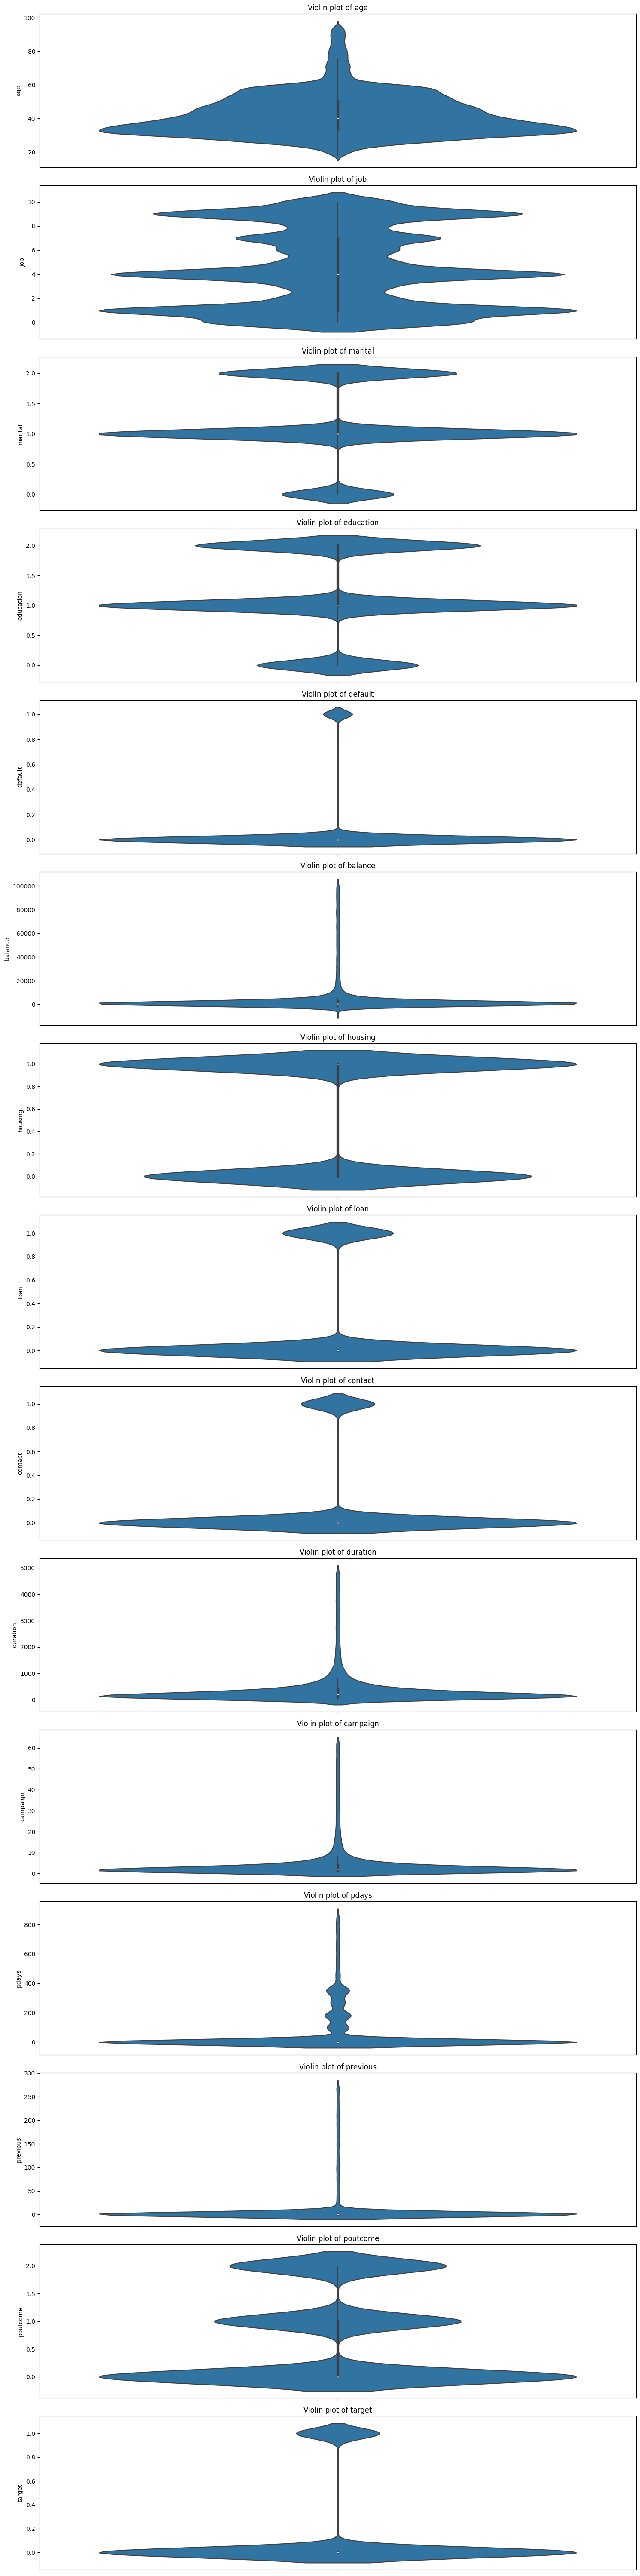

In [21]:
# violin plots
num_cols = d_train.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, len(num_cols) * 4))

for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols), 1, i)
    sns.violinplot(data=d_train, y=col)
    plt.title(f'Violin plot of {col}')

plt.tight_layout()
plt.show()


- the majority of tragets are 0s, which would cause class imbalance

In [22]:
d_train

,last contact date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,target
0,2009-04-17,26,1.0,1.0,1.0,0.0,647,1.0,0.0,0.0,357,2,331,1,1.0,0.0
1,2009-10-11,52,9.0,1.0,1.0,0.0,553,1.0,0.0,1.0,160,1,-1,0,NaN,0.0
2,2010-11-20,44,1.0,1.0,1.0,0.0,1397,0.0,0.0,0.0,326,1,-1,0,NaN,0.0
3,2009-09-01,33,0.0,1.0,1.0,0.0,394,1.0,0.0,1.0,104,3,-1,0,NaN,0.0
4,2008-01-29,31,2.0,2.0,2.0,0.0,137,0.0,0.0,0.0,445,2,-1,0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39206,2008-07-31,31,9.0,2.0,1.0,0.0,0,1.0,0.0,0.0,16,34,-1,0,NaN,0.0
39207,2009-07-31,59,0.0,1.0,0.0,0.0,6187,0.0,0.0,0.0,114,4,-1,0,NaN,0.0
39208,2008-06-02,36,1.0,1.0,1.0,0.0,63,1.0,0.0,NaN,56,8,-1,0,NaN,0.0
39209,2010-03-20,28,8.0,2.0,1.0,0.0,5916,0.0,0.0,0.0,93,5,-1,0,NaN,0.0


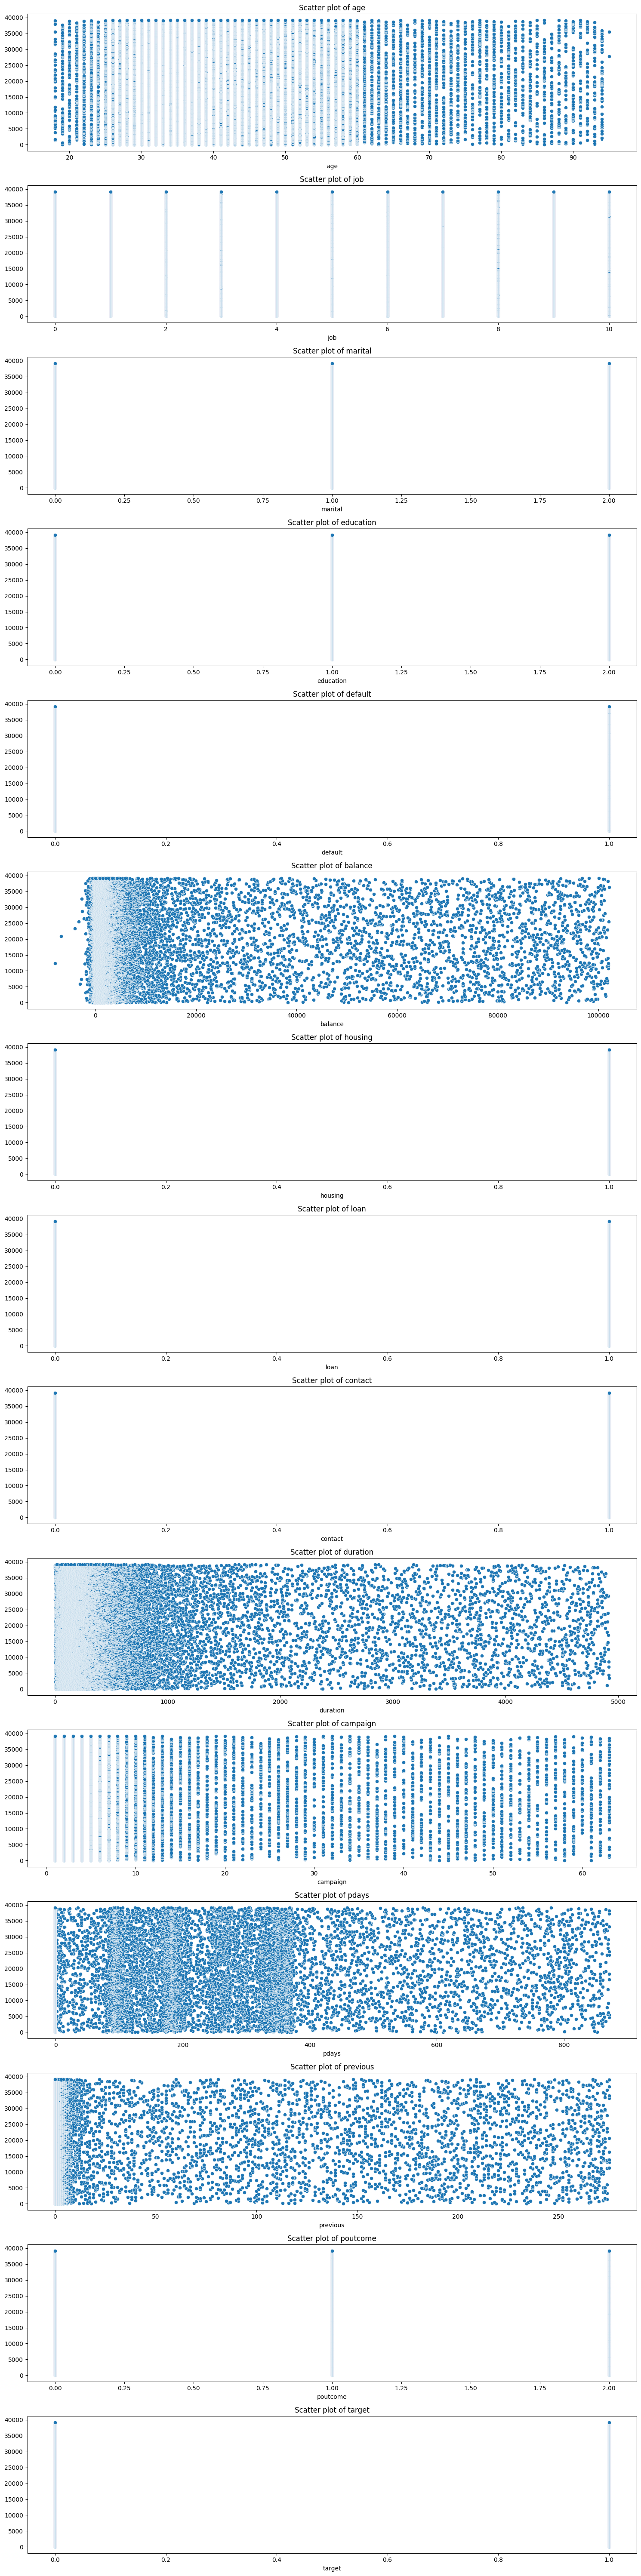

In [23]:
num_cols = d_train.select_dtypes(include=['int64','float64']).columns
plt.figure(figsize=(15, len(num_cols) * 4))

for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols), 1, i)
    sns.scatterplot(data=d_train, x=col, y=d_train.index)  
    plt.title(f'Scatter plot of {col}')

plt.tight_layout()
plt.show()


def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

        # Cap any negative values at 0
        df[col] = df[col].apply(lambda x: max(x, 0))
    
    return df

num_cols = train.select_dtypes(include=['int64']).columns.tolist()
# num_cols.remove('previous')

train_cleaned = remove_outliers(train, num_cols)
train_cleaned.reset_index(drop=True, inplace=True)
train_cleaned.info()


In [24]:
train_cleaned

,age,job,education,balance,duration,campaign,pdays,previous,default_yes,contact_telephone,poutcome_other,poutcome_success,target
0,-1.268393,1.0,1.0,-0.292989,-0.106702,-0.314334,1.607699,-0.245271,0.0,0.0,1.0,0.0,0.0
1,0.777371,9.0,1.0,-0.298732,-0.362850,-0.415446,-0.455175,-0.267926,0.0,1.0,0.0,0.0,0.0
2,0.147905,1.0,1.0,-0.247159,-0.147009,-0.415446,-0.455175,-0.267926,0.0,0.0,0.0,0.0,0.0
3,-0.717610,0.0,1.0,-0.308448,-0.435663,-0.213222,-0.455175,-0.267926,0.0,1.0,0.0,0.0,0.0
4,-0.874977,2.0,2.0,-0.324152,0.007720,-0.314334,-0.455175,-0.267926,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39206,-0.874977,9.0,1.0,-0.332524,-0.550085,2.921249,-0.455175,-0.267926,0.0,0.0,0.0,0.0,0.0
39207,1.328153,0.0,0.0,0.045537,-0.422661,-0.112110,-0.455175,-0.267926,0.0,0.0,0.0,0.0,0.0
39208,-0.481561,1.0,1.0,-0.328674,-0.498075,0.292338,-0.455175,-0.267926,0.0,0.0,0.0,0.0,0.0
39209,-1.111027,8.0,1.0,0.028977,-0.449966,-0.010998,-0.455175,-0.267926,0.0,0.0,0.0,0.0,0.0


the dataset now only contains clean and complete and only contains the columns that are positively correlated to the target. 

## TTS

In [25]:
X = train_cleaned.drop('target', axis=1)
y = train_cleaned['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
def metrics(y_test,y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')
    print(f'Confusion Matrix:\n{conf_matrix}')

## Baseline model

In [27]:
model = DecisionTreeClassifier(max_depth=4)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

## predictions and testing

In [28]:
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Precision
precision = precision_score(y_test, y_pred)

# Recall
recall = recall_score(y_test, y_pred)

# F1 Score
f1 = f1_score(y_test, y_pred)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Cross-validation to get an average performance score
cross_val = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

# Output the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Cross-Validation Accuracy: {cross_val.mean():.4f}")

Accuracy: 0.8599
Precision: 0.5718
Recall: 0.3289
F1 Score: 0.4176
Confusion Matrix:
[[6350  295]
 [ 804  394]]
Cross-Validation Accuracy: 0.8682


In [29]:
test=pd.read_csv(r'/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv')
test

,last contact date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome
0,2009-11-21,36,management,single,tertiary,no,7,no,no,NaN,20,1,-1,0,NaN
1,2010-02-04,30,unemployed,married,tertiary,no,1067,no,no,cellular,78,2,-1,0,NaN
2,2010-07-28,32,blue-collar,single,secondary,no,82,yes,no,cellular,86,4,-1,0,NaN
3,2010-06-09,38,admin.,married,primary,no,1487,no,no,NaN,332,2,-1,0,NaN
4,2008-03-02,59,management,married,tertiary,no,315,no,no,cellular,591,1,176,2,failure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2010-11-20,38,management,single,tertiary,no,8953,no,yes,cellular,301,1,-1,0,NaN
9996,2009-06-03,26,admin.,single,secondary,no,317,yes,no,NaN,953,1,-1,0,NaN
9997,2010-04-20,26,technician,single,secondary,no,181,no,no,cellular,158,2,-1,0,NaN
9998,2010-02-17,32,management,single,tertiary,no,312,no,no,cellular,232,2,-1,0,NaN


In [30]:
test.isna().sum()

last contact date       0
age                     0
job                    59
marital                 0
education             390
default                 0
balance                 0
housing                 0
loan                    0
contact              2684
duration                0
campaign                0
pdays                   0
previous                0
poutcome             7508
dtype: int64

job, education, contact, poutcome

In [31]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   last contact date  10000 non-null  object
 1   age                10000 non-null  int64 
 2   job                9941 non-null   object
 3   marital            10000 non-null  object
 4   education          9610 non-null   object
 5   default            10000 non-null  object
 6   balance            10000 non-null  int64 
 7   housing            10000 non-null  object
 8   loan               10000 non-null  object
 9   contact            7316 non-null   object
 10  duration           10000 non-null  int64 
 11  campaign           10000 non-null  int64 
 12  pdays              10000 non-null  int64 
 13  previous           10000 non-null  int64 
 14  poutcome           2492 non-null   object
dtypes: int64(6), object(9)
memory usage: 1.1+ MB


In [32]:
test.drop(['last contact date','marital','loan','housing'],inplace=True,axis=1)

In [33]:
test

,age,job,education,default,balance,contact,duration,campaign,pdays,previous,poutcome
0,36,management,tertiary,no,7,NaN,20,1,-1,0,NaN
1,30,unemployed,tertiary,no,1067,cellular,78,2,-1,0,NaN
2,32,blue-collar,secondary,no,82,cellular,86,4,-1,0,NaN
3,38,admin.,primary,no,1487,NaN,332,2,-1,0,NaN
4,59,management,tertiary,no,315,cellular,591,1,176,2,failure
...,...,...,...,...,...,...,...,...,...,...,...
9995,38,management,tertiary,no,8953,cellular,301,1,-1,0,NaN
9996,26,admin.,secondary,no,317,NaN,953,1,-1,0,NaN
9997,26,technician,secondary,no,181,cellular,158,2,-1,0,NaN
9998,32,management,tertiary,no,312,cellular,232,2,-1,0,NaN


In [34]:
ordinal_cols = ['education', 'job']
test_processed = custom_preprocessing(test, ordinal_cols=ordinal_columns,target=None)

test_processed

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,age,job,education,balance,duration,campaign,pdays,previous,default_yes,contact_telephone,poutcome_other,poutcome_success
0,-0.494976,4.0,2.0,-0.333785,-0.547978,-0.416995,-0.453373,-0.270508,0.0,0.0,0.0,0.0
1,-0.969303,10.0,2.0,-0.267302,-0.471782,-0.316748,-0.453373,-0.270508,0.0,0.0,0.0,0.0
2,-0.811194,1.0,1.0,-0.329081,-0.461272,-0.116256,-0.453373,-0.270508,0.0,0.0,0.0,0.0
3,-0.336867,0.0,0.0,-0.240959,-0.138096,-0.316748,-0.453373,-0.270508,0.0,0.0,0.0,0.0
4,1.323277,4.0,2.0,-0.314467,0.202159,-0.416995,0.650351,-0.225528,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.336867,4.0,2.0,0.227312,-0.178821,-0.416995,-0.453373,-0.270508,0.0,0.0,0.0,0.0
9996,-1.285521,0.0,1.0,-0.314342,0.677727,-0.416995,-0.453373,-0.270508,0.0,0.0,0.0,0.0
9997,-1.285521,9.0,1.0,-0.322872,-0.366684,-0.316748,-0.453373,-0.270508,0.0,0.0,0.0,0.0
9998,-0.811194,4.0,2.0,-0.314656,-0.269468,-0.316748,-0.453373,-0.270508,0.0,0.0,0.0,0.0


In [35]:
test=test_processed

In [36]:
pred_test=model.predict(test)
submission = pd.DataFrame({
    'id': test.index,  
    'target': pred_test
})

# Save the DataFrame as a CSV file
submission.to_csv('/kaggle/working/submission_milestone1.csv', index=False)

print("Submission file saved!")

Submission file saved!


# Milestone 2

## SGD Classifier

In [37]:
# tunning the hyperparameters
# X_train=
sgd=SGDClassifier()
parameters = {'alpha':[0.0001,0.001,0.01,0.1,1,10,100], 'max_iter':[1000,10000,100000]}
clf = GridSearchCV(sgd, parameters,n_jobs=-1)
clf.fit(X_train, y_train)
best_params=clf.best_params_
print(best_params)
sgd_best = SGDClassifier(alpha=best_params['alpha'], max_iter=best_params['max_iter'])
sgd_best.fit(X_train, y_train)

y_pred=sgd_best.predict(X_test)
# bias term
# print(sgd_best.intercept_)
# weights
# print(sgd_best.coef_)
metrics(y_test,y_pred)

{'alpha': 0.001, 'max_iter': 1000}
Accuracy: 0.8564324875685324
Precision: 0.8289125725410215
Recall: 0.8564324875685324
F1 Score: 0.829170811001452
Confusion Matrix:
[[6443  202]
 [ 924  274]]


# ridge classifier

In [38]:
rc=RidgeClassifier()
parameters = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],'max_iter':[1000,10000,100000]}
clf = GridSearchCV(rc, parameters,n_jobs=-1)
clf.fit(X_train, y_train)
best_params = clf.best_params_
print(best_params)
# tunning the hyperparameters.
ridge_best = RidgeClassifier(alpha=best_params['alpha'],max_iter=best_params['max_iter'])
ridge_best.fit(X_train, y_train)

y_pred = ridge_best.predict(X_test)

metrics(y_test,y_pred)

{'alpha': 1, 'max_iter': 1000}
Accuracy: 0.8504398826979472
Precision: 0.8155497597025181
Recall: 0.8504398826979472
F1 Score: 0.8158101139002335
Confusion Matrix:
[[6469  176]
 [ 997  201]]


# logistic regression

In [39]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

In [40]:
metrics(y_test,y_pred)

Accuracy: 0.8518424072421268
Precision: 0.8196187831244158
Recall: 0.8518424072421268
F1 Score: 0.8206945158514461
Confusion Matrix:
[[6450  195]
 [ 967  231]]


In [41]:
pred_test=sgd_best.predict(test)
pred_test_labels = np.where(pred_test == 1, 'yes', 'no')

submission = pd.DataFrame({
    'id': test.index,  
    'target': pred_test_labels
})

submission.to_csv('/kaggle/working/submission.csv', index=False)

print("Submission file saved!")


Submission file saved!


In [42]:
len(pred_test)

10000

In [43]:
sb=pd.read_csv(r'/kaggle/input/predict-the-success-of-bank-telemarketing/sample_submission.csv')

In [44]:
sb

,id,target
0,0,no
1,1,no
2,2,no
3,3,yes
4,4,yes
...,...,...
9995,9995,yes
9996,9996,no
9997,9997,no
9998,9998,no


In [45]:
pred_test_labels

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype='<U3')

# milestone 3
Dimensionality Reduction

Feature Selection

Retrain the models


Naive Bayes

Nearest Neighbors

Support Vector Machines

In [46]:
X

,age,job,education,balance,duration,campaign,pdays,previous,default_yes,contact_telephone,poutcome_other,poutcome_success
0,-1.268393,1.0,1.0,-0.292989,-0.106702,-0.314334,1.607699,-0.245271,0.0,0.0,1.0,0.0
1,0.777371,9.0,1.0,-0.298732,-0.362850,-0.415446,-0.455175,-0.267926,0.0,1.0,0.0,0.0
2,0.147905,1.0,1.0,-0.247159,-0.147009,-0.415446,-0.455175,-0.267926,0.0,0.0,0.0,0.0
3,-0.717610,0.0,1.0,-0.308448,-0.435663,-0.213222,-0.455175,-0.267926,0.0,1.0,0.0,0.0
4,-0.874977,2.0,2.0,-0.324152,0.007720,-0.314334,-0.455175,-0.267926,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
39206,-0.874977,9.0,1.0,-0.332524,-0.550085,2.921249,-0.455175,-0.267926,0.0,0.0,0.0,0.0
39207,1.328153,0.0,0.0,0.045537,-0.422661,-0.112110,-0.455175,-0.267926,0.0,0.0,0.0,0.0
39208,-0.481561,1.0,1.0,-0.328674,-0.498075,0.292338,-0.455175,-0.267926,0.0,0.0,0.0,0.0
39209,-1.111027,8.0,1.0,0.028977,-0.449966,-0.010998,-0.455175,-0.267926,0.0,0.0,0.0,0.0


# retraining the models

In [47]:
def create_pipe(model):
    pipeline = Pipeline([
        ('feature_selection', SelectKBest(mutual_info_classif)),  
        ('pca', PCA()),
        ('clf', model)
    ])
    return pipeline

## Decision tree

In [48]:
model=DecisionTreeClassifier()
# model.fit(x_train, y_train)

### decsion tree

In [49]:
param_grid = {
    'pca__n_components': [7, 8, 10],  
    'clf__max_depth': [3, 4, 5, 6]
    # 'clf__min_samples_split': [2, 5, 10],      
    # 'clf__min_samples_leaf': [1, 2, 4],        
    # 'clf__criterion': ['gini', 'entropy']      
}

pipeline = create_pipe(model)
grid_search = GridSearchCV(pipeline, param_grid, cv=5,n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Cross-Validation Score: {grid_search.best_score_}')

y_pred_pca = grid_search.predict(X_test)
metrics(y_test,y_pred_pca)
cross_val = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {cross_val.mean():.4f}")


Best Parameters: {'clf__max_depth': 5, 'pca__n_components': 10}
Best Cross-Validation Score: 0.8664882273717259
Accuracy: 0.8574525054188449
Precision: 0.8382440761090593
Recall: 0.8574525054188449
F1 Score: 0.843385263786235
Confusion Matrix:
[[6310  335]
 [ 783  415]]
Cross-Validation Accuracy: 0.8658


## SGD

In [50]:
sgd = SGDClassifier()
parameters = {'pca__n_components': [7, 9, 10],
              'clf__alpha': [0.01, 0.1, 1, 10, 100],
              'clf__max_iter': [1000, 10000, 100000]}

pipeline = create_pipe(sgd)
clf = GridSearchCV(pipeline, parameters,n_jobs=-1)
clf.fit(X_train, y_train)

best_params = clf.best_params_

print(best_params)
y_pred = clf.best_estimator_.predict(X_test)

metrics(y_test,y_pred)

{'clf__alpha': 0.01, 'clf__max_iter': 10000, 'pca__n_components': 10}
Accuracy: 0.8481448425347443
Precision: 0.8103574121431423
Recall: 0.8481448425347443
F1 Score: 0.8120186165357864
Confusion Matrix:
[[6467  178]
 [1013  185]]


## Ridge classifier

In [51]:
rc=RidgeClassifier()

# parameters = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],'max_iter':[1000,10000,100000]}
parameters = {'pca__n_components': [7, 9, 10],
              'clf__alpha': [0.01, 0.1, 1, 10, 100],
              'clf__max_iter': [1000, 10000, 100000]}
pipeline = create_pipe(rc)
clf = GridSearchCV(pipeline, parameters,n_jobs=-1)
clf.fit(X_train, y_train)
# clf = GridSearchCV(rc, parameters)
# clf.fit(X_train, y_train)
best_params = clf.best_params_
# tunning the hyperparameters.
# ridge_best_pca = RidgeClassifier(alpha=best_params['alpha'],max_iter=best_params['max_iter'])
# ridge_best_pca.fit(x_train, y_train)
print(best_params)

y_pred = clf.best_estimator_.predict(X_test)

# y_pred = ridge_best_pca.predict(x_test)

metrics(y_test,y_pred)

{'clf__alpha': 0.1, 'clf__max_iter': 1000, 'pca__n_components': 10}
Accuracy: 0.8478898380721662
Precision: 0.8091369876513517
Recall: 0.8478898380721662
F1 Score: 0.8104322040707219
Confusion Matrix:
[[6475  170]
 [1023  175]]


## logistic regression

In [52]:
log_reg = LogisticRegression()
parameters = {'pca__n_components': [7, 9, 10],
              # 'clf__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
              'clf__max_iter': [1000, 10000],
              'clf__penalty': ['l1', 'l2', 'elasticnet'],
              'clf__solver': ['lbfgs', 'saga', 'liblinear']  # Solvers for different penalties

}
pipeline = create_pipe(log_reg)
clf = GridSearchCV(pipeline, parameters,n_jobs=-1)
clf.fit(X_train, y_train)
# log_reg.fit(x_train, y_train)
best_params = clf.best_params_
print(best_params)
y_pred = clf.best_estimator_.predict(X_test)
# y_pred = log_reg.predict(x_test)
metrics(y_test,y_pred)

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
120 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)

{'clf__max_iter': 10000, 'clf__penalty': 'l2', 'clf__solver': 'lbfgs', 'pca__n_components': 10}
Accuracy: 0.8499298737727911
Precision: 0.8146953556644437
Recall: 0.8499298737727911
F1 Score: 0.8155851554059409
Confusion Matrix:
[[6464  181]
 [ 996  202]]


In [53]:
best_params

{'clf__max_iter': 10000,
 'clf__penalty': 'l2',
 'clf__solver': 'lbfgs',
 'pca__n_components': 10}

## SVM

In [54]:
svm_classifier = SVC()  
parameters_svm = {
    'pca__n_components': [9,10],  
    # 'clf__C': [0.1, 1, 10],  
    # 'clf__kernel': ['linear', 'rbf'],  
    # 'clf__gamma': ['scale', 'auto'],  
    'clf__max_iter': [1000,100,10000]  
}
pipeline = create_pipe(svm_classifier)
# svm_classifier.fit(X_train, y_train)
clf = GridSearchCV(pipeline, parameters_svm, cv=3, n_jobs=-1)  
clf.fit(X_train, y_train)
best_params = clf.best_params_
# print(best_params)
y_pred = clf.best_estimator_.predict(X_test)

# y_pred = svm_classifier.predict(X_test)

metrics(y_test,y_pred)

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider 

Accuracy: 0.8565599897998215
Precision: 0.8325275133858031
Recall: 0.8565599897998215
F1 Score: 0.8364164373234703
Confusion Matrix:
[[6375  270]
 [ 855  343]]


In [55]:
clf.best_params_

{'clf__max_iter': 10000, 'pca__n_components': 10}

## naive bayes

In [56]:
nb_classifier = GaussianNB()
# nb_classifier.fit(X_train, y_train)
parameters_nb = {
    'pca__n_components': [7, 9, 10]  # Tuning PCA components
}

pipeline_nb = create_pipe(nb_classifier)

clf_nb = GridSearchCV(pipeline_nb, parameters_nb, cv=3, n_jobs=-1)
clf_nb.fit(X_train, y_train)

y_pred_nb = clf_nb.predict(X_test)

metrics(y_test,y_pred_nb)

Accuracy: 0.8515874027795487
Precision: 0.8398579408669138
Recall: 0.8515874027795487
F1 Score: 0.8445774615490059
Confusion Matrix:
[[6184  461]
 [ 703  495]]


In [57]:
clf_nb.best_params_

{'pca__n_components': 9}

# clustering

In [58]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train)

y_kmeans = kmeans.predict(X_test)

def get_mapped_labels(y_true, y_pred):
    labels = np.zeros_like(y_pred)
    for i in range(3):  # Assuming 3 clusters
        mask = (y_pred == i)
        if np.any(mask):  # Check if the mask has any true values
            labels[mask] = mode(y_true[mask])[0]
    return labels

mapped_labels = get_mapped_labels(y_test, y_kmeans)

metrics(y_test,mapped_labels)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Accuracy: 0.847252326915721
Precision: 0.7178365054641038
Recall: 0.847252326915721
F1 Score: 0.7771937758634685
Confusion Matrix:
[[6645    0]
 [1198    0]]


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## submitting prediction via naive bayes.

In [59]:
pred_test=clf_nb.predict(test)
pred_test_labels = np.where(pred_test == 1, 'yes', 'no')

submission = pd.DataFrame({
    'id': test.index,  
    'target': pred_test_labels
})

submission.to_csv('/kaggle/working/submission.csv', index=False)

print("Submission file saved!")


Submission file saved!


## Milestone 4


making:
1. Ensemble (Bagging, Boosting, Stacking)
2. Multi-layer Perceptron

In [60]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'binary:logistic',  
    'max_depth': 6,
    'eta': 0.1,
    'eval_metric': 'logloss'
}

model_xgb = xgb.train(params, dtrain, num_boost_round=100, evals=[(dtest, 'test')])
y_pred_xgb = model_xgb.predict(dtest)

y_pred_xgb = model_xgb.predict(dtest)
# metrics
y_pred_xgb_binary = [1 if pred > 0.5 else 0 for pred in y_pred_xgb]
metrics(y_test,y_pred_xgb_binary)

[0]	test-logloss:0.40989
[1]	test-logloss:0.39135
[2]	test-logloss:0.37619
[3]	test-logloss:0.36372
[4]	test-logloss:0.35346
[5]	test-logloss:0.34485
[6]	test-logloss:0.33736
[7]	test-logloss:0.33097
[8]	test-logloss:0.32545
[9]	test-logloss:0.32082
[10]	test-logloss:0.31663
[11]	test-logloss:0.31313
[12]	test-logloss:0.31006
[13]	test-logloss:0.30751
[14]	test-logloss:0.30527
[15]	test-logloss:0.30335
[16]	test-logloss:0.30124
[17]	test-logloss:0.29955
[18]	test-logloss:0.29805
[19]	test-logloss:0.29686
[20]	test-logloss:0.29590
[21]	test-logloss:0.29477
[22]	test-logloss:0.29394
[23]	test-logloss:0.29313
[24]	test-logloss:0.29250
[25]	test-logloss:0.29188
[26]	test-logloss:0.29127
[27]	test-logloss:0.29083
[28]	test-logloss:0.29048
[29]	test-logloss:0.28999
[30]	test-logloss:0.28969
[31]	test-logloss:0.28949
[32]	test-logloss:0.28927
[33]	test-logloss:0.28892
[34]	test-logloss:0.28883
[35]	test-logloss:0.28863
[36]	test-logloss:0.28838
[37]	test-logloss:0.28828
[38]	test-logloss:0.28

In [61]:
# lightgbm model
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

params = {
    'objective': 'binary',  
    'metric': 'binary_logloss',
    'boosting': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
}

model_lgb = lgb.train(params, train_data, num_boost_round=100, valid_sets=[test_data])

y_pred_lgb = model_lgb.predict(X_test)
y_pred_lgb_binary = [1 if pred > 0.5 else 0 for pred in y_pred_lgb]

metrics(y_test,y_pred_lgb_binary)

[LightGBM] [Info] Number of positive: 4629, number of negative: 26739
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007023 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1172
[LightGBM] [Info] Number of data points in the train set: 31368, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.147571 -> initscore=-1.753782
[LightGBM] [Info] Start training from score -1.753782
Accuracy: 0.8617875812826724
Precision: 0.8479254211233512
Recall: 0.8617875812826724
F1 Score: 0.8525587578609104
Confusion Matrix:
[[6266  379]
 [ 705  493]]


In [62]:
# bagging 
model_bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10)
model_bagging.fit(X_train, y_train)
y_pred_bagging = model_bagging.predict(X_test)

metrics(y_test,y_pred_bagging)

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.855157465255642
Precision: 0.8374361271362832
Recall: 0.855157465255642
F1 Score: 0.8429899358140202
Confusion Matrix:
[[6274  371]
 [ 765  433]]


In [63]:
# stackign algorithm
estimators = [('dt', DecisionTreeClassifier()), ('svr', SVC())]  # Use classifiers
model_stacking = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
model_stacking.fit(X_train, y_train)

y_pred_stacking = model_stacking.predict(X_test)

metrics(y_test,y_pred_stacking)

Accuracy: 0.855029963024353
Precision: 0.8261483977227577
Recall: 0.855029963024353
F1 Score: 0.8265208713771616
Confusion Matrix:
[[6446  199]
 [ 938  260]]


In [64]:
# MLP 
param_grid = {
    'hidden_layer_sizes': [(50,), (100,)], 
    'activation': ['relu'], 
    'solver': ['adam'], 
    'max_iter': [500, 1000]
}

mlp = MLPClassifier(random_state=42, early_stopping=True)
grid_search = GridSearchCV(mlp, param_grid, cv=3, n_jobs=-1)  
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

y_pred = grid_search.best_estimator_.predict(X_test)

metrics(y_test,y_pred)

Accuracy: 0.8612775723575162
Precision: 0.8508475791030983
Recall: 0.8612775723575162
F1 Score: 0.8549094235219071
Confusion Matrix:
[[6219  426]
 [ 662  536]]


In [65]:
best_params

{'activation': 'relu',
 'hidden_layer_sizes': (100,),
 'max_iter': 500,
 'solver': 'adam'}

## MLP has outperformde all the models by far, so sybmitting a prediction via this 

In [66]:
pred_test=grid_search.best_estimator_.predict(test)
pred_test_labels = np.where(pred_test == 1, 'yes', 'no')

submission = pd.DataFrame({
    'id': test.index,  
    'target': pred_test_labels
})

submission.to_csv('/kaggle/working/submission.csv', index=False)

print("Submission file saved!")


Submission file saved!
